# Measure, write, read and plot P3D from sim

In [1]:
import pickle
import fake_spectra.griddedspectra as grid_spec
from lace.setup_simulations import read_genic
from lace.postprocess import measure_flux_power

### Read and plot pre-computed P3D from test sim

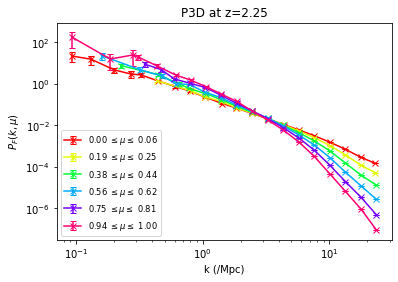

In [2]:
fname='test_p3d.p'
test_p3d=pickle.load(open(fname,"rb"))
measure_flux_power.plot_p3d(test_p3d)

### Compute P3D from skewers (it will take a few minutes)

In [3]:
# path to simulation directory
basedir='/data/desi/common/HydroData/Emulator/untar_hydro_sims/Australia20'
simdir=basedir+'/sim_pair_1/sim_minus'
skewers_dir=simdir+'/output/skewers'

In [4]:
# open GenIC file to get box size
genic_file=simdir+'/paramfile.genic'
L_Mpc=read_genic.L_Mpc_from_paramfile(genic_file,verbose=True)

successfully read healthy configuration file
in L_Mpc, 45225.0 0.67 67.5


In [5]:
snap_num=9
# specify file to read
sk_file='skewers_{}_Ns500_wM0.05_sT1.0_sg1.0.hdf5'.format(snap_num)
# read file storing pre-computed skewers
skewers=grid_spec.GriddedSpectra(snap_num, simdir+'/output/',
                savedir=skewers_dir, savefile=sk_file, reload_file=False)

250000  sightlines. resolution:  3.5045807775826137  z= 2.2500000000000004


In [6]:
p3d=measure_flux_power.measure_p3d_Mpc(skewers,L_Mpc,n_k_bins=20,k_Mpc_max=20.0,n_mu_bins=16)

n_xy=500, n_z=1349
Tue Apr 27 20:13:35 2021 got box geometry
Tue Apr 27 20:14:14 2021 got Fourier modes
Tue Apr 27 20:15:06 2021 got binned power
Tue Apr 27 20:15:34 2021 got bin counts
Tue Apr 27 20:16:05 2021 got binned k
Tue Apr 27 20:16:37 2021 got binned mu


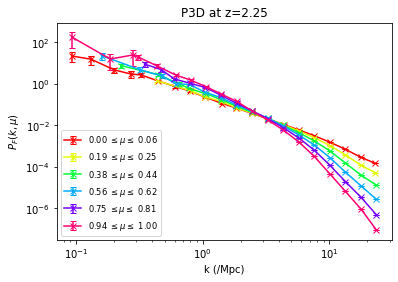

In [7]:
measure_flux_power.plot_p3d(p3d)

In [8]:
if False:
    fname='test_p3d.p'
    pickle.dump(p3d,open(fname,"wb"))